# Chapter 2
**Author:** Veasna Bun  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
## Section 2.1: Frequency Distributions
---

A **frequency distribution** is a way to organize and display the values in a data set, showing how often each value or range of values occurs. The frequencies (**f**) represent the number of data points that fall into each category or how many times a specific value or range appears in the data set.

A **class** is a category of data in a frequency distribution. 
+ An **ungrouped frequency distribution** is a frequency distribution where each category or class represents a single value.
+ A **grouped frequency distribution** is a frequency distribution where the classes are ranges of possible values.

In [6]:
# Sample data
data = ['A', 'B', 'C', 'D', 'F', 'C', 'D', 'F', 'C', 'D', 'A', 'A']

# Ungrouped frequency distribution
ungrouped_freq = pd.DataFrame(pd.Series(data).value_counts().sort_index(), columns=['Frequency'])
ungrouped_freq.index.name = 'Class'
ungrouped_freq.reset_index(inplace=True)

# Display the table
print("Ungrouped Frequency Distribution:")
print(ungrouped_freq.to_string(index=False))


Ungrouped Frequency Distribution:
Class  Frequency
    A          3
    B          1
    C          3
    D          3
    F          2


In [91]:
# Sample numeric data
data = [5, 7, 8, 12, 15, 18, 22, 25, 27, 30, 32, 35, 37, 40]

# Step 1: given the number of classes
num_classes = 4

# Step 2: Calculate class width
    # by first finding our dataset range: 
data_range = np.max(data) - np.min(data)
    # divide by the number of class rounded to the next integer value
class_width = np.ceil(data_range / num_classes)
    # class width = ceil(range/ # of class)

# Step 3: Determine class limits
min_limit = np.min(data)
bins = np.arange(min_limit, np.max(data) + class_width, class_width)

# Step 5: Create a grouped frequency distribution
# Apply pd.cut with right=False to make intervals [left, right)
grouped_data = pd.cut(data, bins=bins, right=False)
grouped_freq = pd.value_counts(grouped_data).sort_index()

# Create a DataFrame for display
grouped_freq_table = pd.DataFrame({
    'Class': grouped_freq.index,
    'Frequency': grouped_freq.values,
})
# Display the table 
print("Grouped Frequency Distribution:")
print(grouped_freq_table.to_string(index=False))

Grouped Frequency Distribution:
       Class  Frequency
 [5.0, 14.0)          4
[14.0, 23.0)          3
[23.0, 32.0)          3
[32.0, 41.0)          4


### Characteristics: Class Boundary
A Class Boundary is the value that lies haftway between the upper limit of one class and the lower limit of the next class. 
1. Subtract the second class lower limit from the first class upper limit.
2. Divide the difference by 2
3. Adjust Lower and Upper Class Limits: (Subtract from all lower class limits, Add to all upper class limits)

In [9]:
# step 1:
upper_limit = bins[1] - 1
lower_limt = bins[1]

# step 2:
value = (lower_limt - upper_limit) / 2

# update our bin
updated_bins = np.arange(min_limit - value, np.max(data) + class_width + value, class_width)
# Update the grouped data
update_grouped_data = pd.cut(data, bins=updated_bins, right=False)
update_grouped_freq = pd.value_counts(update_grouped_data).sort_index()

# step 3:
# Create a DataFrame for display
grouped_freq_table = pd.DataFrame({
    'Class': grouped_freq.index,
    'Frequency': grouped_freq.values,
    'Class Boundaries': update_grouped_freq.index,
})

# Display the table 
print("Grouped Frequency Distribution with Class Boundary:")
print(grouped_freq_table.to_string(index=False))


Grouped Frequency Distribution with Class Boundary:
       Class  Frequency Class Boundaries
 [5.0, 14.0)          4      [4.5, 13.5)
[14.0, 23.0)          3     [13.5, 22.5)
[23.0, 32.0)          3     [22.5, 31.5)
[32.0, 41.0)          4     [31.5, 40.5)


### Characteristics: Class Midpoint
The class **midpoint** are often used for estimating the average value in each class.

In [11]:
grouped_freq_table = pd.DataFrame({
    'Class': grouped_freq.index,
    'Frequency': grouped_freq.values,
    'Midpoint': [(bins[i] + (bins[i+1] - 1)) / 2 for i in range(len(bins) - 1)]
})

# Display the table 
print("Grouped Frequency Distribution with Midpoint:")
print(grouped_freq_table.to_string(index=False))

Grouped Frequency Distribution with Midpoint:
       Class  Frequency  Midpoint
 [5.0, 14.0)          4       9.0
[14.0, 23.0)          3      18.0
[23.0, 32.0)          3      27.0
[32.0, 41.0)          4      36.0


### Characteristics: Relative Frequency
The **relative freuency** is the faction or percentage of the data set that falls into a particular class, given by 
+ Relative Frequency = Class Frequency / Sample Size

In [13]:
grouped_freq_table = pd.DataFrame({
    'Class': grouped_freq.index,
    'Frequency': grouped_freq.values,
    'Relative Frequency':  grouped_freq.values / len(data)
})

# Display the table 
print("Grouped Frequency Distribution with Relative Frequency:")
print(grouped_freq_table.to_string(index=False))

Grouped Frequency Distribution with Relative Frequency:
       Class  Frequency  Relative Frequency
 [5.0, 14.0)          4            0.285714
[14.0, 23.0)          3            0.214286
[23.0, 32.0)          3            0.214286
[32.0, 41.0)          4            0.285714


### Characteristics: Cumulative Frequency
The **Cumulative Frequency** is the sum of the frequencies of a given class and all previous classes.

In [15]:
grouped_freq_table = pd.DataFrame({
    'Class': grouped_freq.index,
    'Frequency': grouped_freq.values,
    'Cumulative Frequency':  grouped_freq.values.cumsum()
})

# Display the table 
print("Grouped Frequency Distribution with Cumulative Frequency:")
print(grouped_freq_table.to_string(index=False))

Grouped Frequency Distribution with Cumulative Frequency:
       Class  Frequency  Cumulative Frequency
 [5.0, 14.0)          4                     4
[14.0, 23.0)          3                     7
[23.0, 32.0)          3                    10
[32.0, 41.0)          4                    14


---
## Section 2.2.1: Displaying Qualitative Data
---

There are five common ways to display **qualitative data:**
1. **Pie Chart:** Displays how large each category is in relation to the whole, using proportional slices of a circle.
2. **Bar Graph:** Uses bars to represent the amount of data in each category, with the height corresponding to frequency.
3. **Pareto Chart:** A bar graph where the bars are arranged in descending order of frequency, highlighting the most important categories.
4. **Side-by-Side Bar Graph:** Compares the same categories across different groups, with bars placed next to each other for comparison.
5. **Stacked Bar Graph:** Compares the same categories across different groups, with bars stacked to show the total and the contribution of each subgroup.

### Pie Chart:
A **Pie Chart:** display the relative frequencies from the frequency distribution are used to determine the size of each wedge in the pie chart. Each wedge’s central angle is calculated by multiplying the relative frequency of each class by 360 degrees and then rounding to the nearest whole degree.
+ Central Angle measure = Relative frequencies * 360

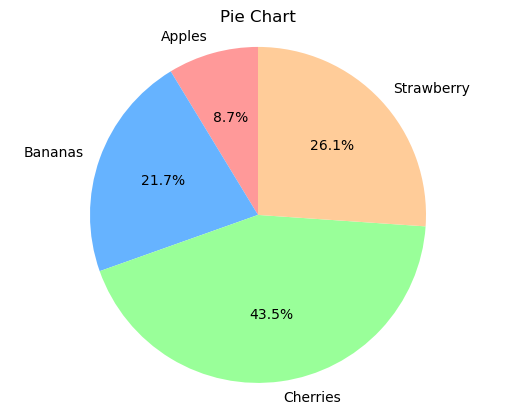

In [19]:
# Data for the pie chart
labels = ['Apples', 'Bananas', 'Cherries', 'Strawberry']

# Percentages or quantities
sizes = [10, 25, 50, 30]

# Optional: custom colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Chart')

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

### Bar Graph
A **Bar Graph** displays how often each category is selected in qualitative data. The horizontal axis represents the categories, while the vertical axis shows the frequency. Unlike histograms, the bars in a bar graph should not touch, as the data is categorical, not continuous.

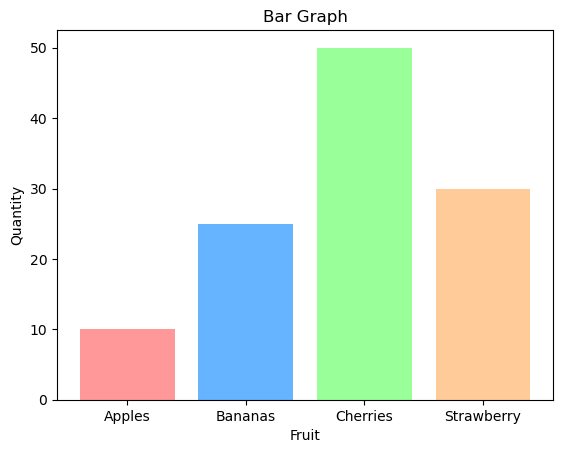

In [21]:
# Data for the bar graph
labels = ['Apples', 'Bananas', 'Cherries', 'Strawberry']

# Quantities or frequencies
sizes = [10, 25, 50, 30]

# Create the bar graph
plt.bar(labels, sizes, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Add a title
plt.title('Bar Graph')

# Add labels to the x and y axes
plt.xlabel('Fruit')
plt.ylabel('Quantity')

# Display the bar graph
plt.show()

### Pareto Chart
A **Pareto Chart** is a bar graph where the bars are arranged in descending order, from the most frequent to the least frequent, making it easy to identify the most significant factors in a data set.

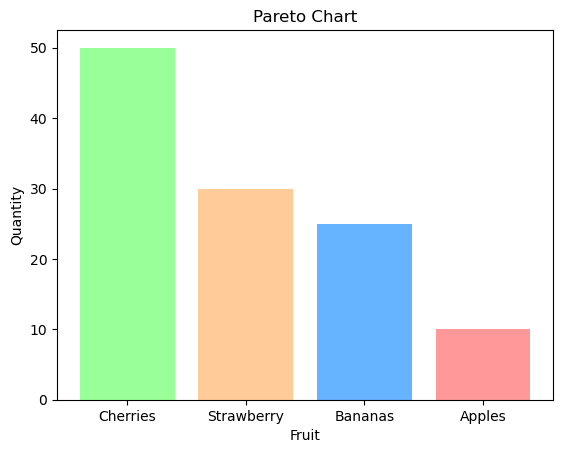

In [23]:
# Data for the bar graph
labels = ['Apples', 'Bananas', 'Cherries', 'Strawberry']

# Quantities or frequencies
sizes = [10, 25, 50, 30] 

# Optional: custom colors
colors =['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Sort the data in descending order based on sizes
sorted_indices = np.argsort(sizes)[::-1]
sorted_colors =[colors[i] for i in sorted_indices]
sorted_labels = [labels[i] for i in sorted_indices]
sorted_sizes = [sizes[i] for i in sorted_indices]

# Create the bar graph
fig, ax = plt.subplots()

# Bar chart for sorted sizes
ax.bar(sorted_labels, sorted_sizes, color=sorted_colors)
ax.set_xlabel('Fruit')
ax.set_ylabel('Quantity')
ax.set_title('Pareto Chart')

# Show the plot
plt.show()

### Side-By-Side Bar Graph
A **Side-by-Side Bar Graph** compares the differences in the *same variable* across *two or more different groups*. In this type of graph, bars for each group are placed next to each other, allowing for easy comparison between the groups.

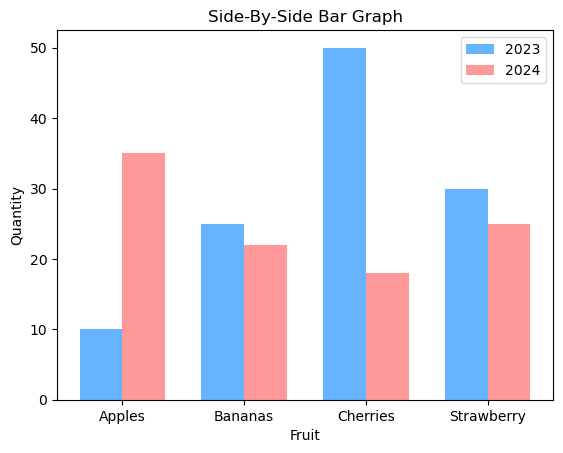

In [25]:
# Data for the bar graph
labels = ['Apples', 'Bananas', 'Cherries', 'Strawberry']
sizes_2023 = [10, 25, 50, 30]  # Data for 2023
sizes_2024 = [35, 22, 18, 25]  # Data for 2024

# Set width of bars
bar_width = 0.35

# Set positions for the bars
index = np.arange(len(labels))

# Create side-by-side bars
fig, ax = plt.subplots()
bar1 = ax.bar(index, sizes_2023, bar_width, label='2023', color='#66b3ff')
bar2 = ax.bar(index + bar_width, sizes_2024, bar_width, label='2024', color='#ff9999')

# Add labels and title
ax.set_xlabel('Fruit')
ax.set_ylabel('Quantity')
ax.set_title('Side-By-Side Bar Graph')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)

# Add legend
ax.legend()

# Show the plot
plt.show()

### Stacked Bar Graph
A **Stacked Bar Graph** compares totals for the *same variable* across two or more *different groups*. Each bar represents the total for a group, with segments stacked on top of each other to show the contribution of each subgroup to the total.

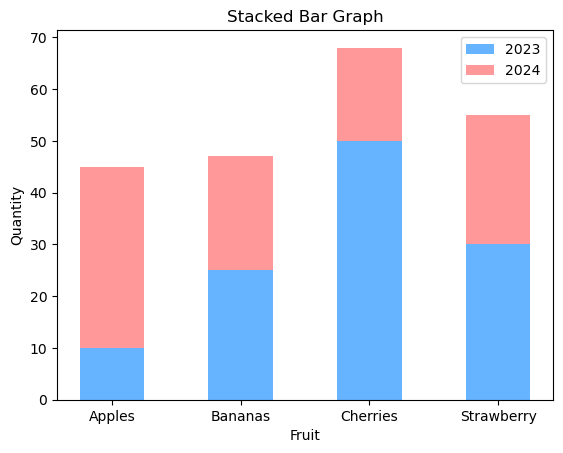

In [93]:
# Data for the stacked bar graph
labels = ['Apples', 'Bananas', 'Cherries', 'Strawberry']
sizes_2023 = [10, 25, 50, 30]  # Data for 2023
sizes_2024 = [35, 22, 18, 25]  # Data for 2024

# Set positions for the bars
index = np.arange(len(labels))
bar_width = 0.5

# Create the stacked bar chart
fig, ax = plt.subplots()

bar1 = ax.bar(index, sizes_2023, bar_width, label='2023', color='#66b3ff')
bar2 = ax.bar(index, sizes_2024, bar_width, bottom=sizes_2023, label='2024', color='#ff9999')

# Add labels and title
ax.set_xlabel('Fruit')
ax.set_ylabel('Quantity')
ax.set_title('Stacked Bar Graph')
ax.set_xticks(index)
ax.set_xticklabels(labels)

# Add legend
ax.legend()

# Show the plot
plt.show()

---
## Section 2.2.2: Displaying Quantitative Data
---

There are six common way to display Quantitative Data:
1. **Histogram:** A bar graph where the horizontal axis represents a number line. Bars are adjacent to each other, with no gaps between them, to show the frequency distribution of data.
2. **Frequency Polygon:** A line graph that connects the midpoints of the tops of the bars of a histogram. This graph shows the shape of the frequency distribution by connecting these midpoints with straight lines.
3. **Ogive:** A line graph that represents cumulative frequencies. It is created by plotting cumulative frequencies against the upper class boundaries and connecting these points with straight lines.
4. **Stem Plot (Stem-and-Leaf Plot):** A plot where each data point is split into a 'stem' (all digits except the last one) and a 'leaf' (the last digit). This plot retains the original data and provides a quick view of the distribution.
5. **Dot Plot:** A graphical display where a dot is placed above each data label for each data value. This method retains the actual data and allows for easy comparison of frequencies.
6. **Line Graph:** A graph used to display values of a variable over time. The horizontal axis represents time, and the vertical axis represents the variable of interest. Points are connected by lines to show trends over time.

### Histogram
A **histogram** is similar to a bar graph, as it displays how often each range of values occurs. However, because the data is quantitative, the horizontal axis represents a continuous number line, so the bars in a histogram should touch each other. The horizontal axis can display the entire class range, midpoints, or class boundaries, depending on the representation chosen. 

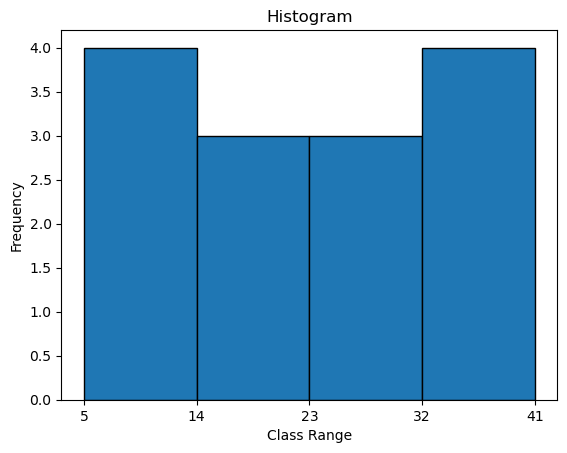

In [31]:
# Using the the data set and bin we created early in section 4.1
# Plot the histogram with custom bins
plt.hist(data, bins=bins, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Class Range')
plt.ylabel('Frequency')
plt.xticks(bins)

plt.show()

### Frequency Polygon
A **frequency polygon** a graphical representation of the distribution of a dataset. It is created by plotting the midpoints of each class interval against their corresponding frequencies and then connecting these points with straight lines.

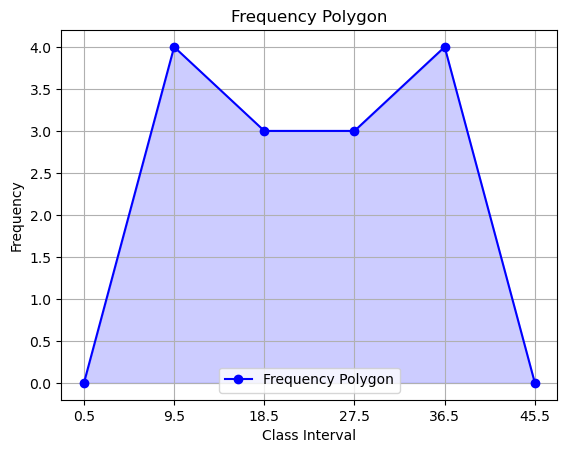

In [124]:
# Using the the data set and bin we created early in section 4.1
# Calculate the midpoint
midpoints = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
# Adjust the midpoints by adding an extra midpoint at the beginning and end
midpoints = [midpoints[0] - class_width] + midpoints + [midpoints[-1] + class_width]

# Create a list of the freq from grouped_freq
frequencies = []
for freq in grouped_freq:
    frequencies.append(freq)
# Adjust the frequencies list by adding zeros at the beginning and end
frequencies = [0] + frequencies + [0]

# Plotting the frequency polygon
plt.plot(midpoints, frequencies, marker='o', linestyle='-', color='b', label='Frequency Polygon')
plt.fill_between(midpoints, frequencies, alpha=0.2, color='b')

# Set x-axis ticks to match the midpoints
plt.xticks(ticks=midpoints)

# Add labels and title
plt.xlabel('Class Interval')
plt.ylabel('Frequency')
plt.title('Frequency Polygon')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Ogive
An **Ogive (pronounced "oh-jive"** i is a graphical representation of the cumulative frequency distribution of a dataset. It is a line graph that displays the cumulative frequency on the vertical axis and the upper boundaries of class intervals (or class boundaries) on the horizontal axis. The ogive is used to show how the cumulative frequency of a dataset increases as you progress through the class intervals. It helps in visualizing the distribution of data, identifying patterns, and determining the number of data points below a certain value.

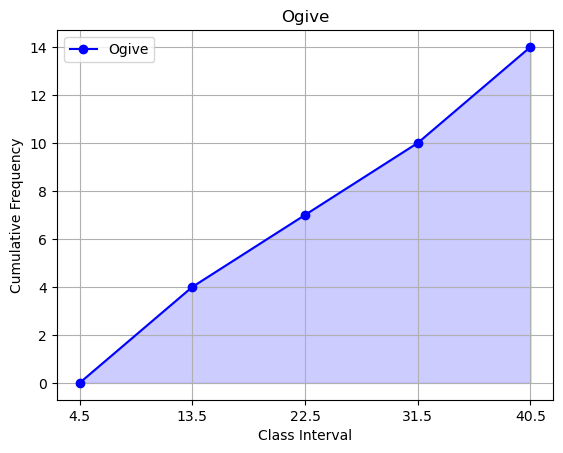

In [144]:
# Using the the data set and bin we created early in section 4.1
# Create a list of the freq from grouped_freq
frequencies = []
for freq in grouped_freq:
    frequencies.append(freq)

# Calculate cumulative frequencies
cumulative_frequencies = np.cumsum(frequencies)
cumulative_frequencies = np.insert(cumulative_frequencies, 0, 0)  # Add 0 at the start

# Where the updated_bin is class boundary i.e horizontal axis
# Plotting the ogive
plt.plot(updated_bins, cumulative_frequencies, marker='o', linestyle='-', color='b', label='Ogive')
plt.fill_between(updated_bins, cumulative_frequencies, alpha=0.2, color='b')

# Set x-axis ticks to match the class boundary
plt.xticks(ticks=updated_bins) 

# Add labels and title
plt.xlabel('Class Interval')
plt.ylabel('Cumulative Frequency')
plt.title('Ogive')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Stem Plot (Stem-and-Leaf Plot)
A **Stem Plot**, also known as a Stem-and-Leaf Plot, is a type of graphical representation that displays data while retaining the original values. It is similar to a histogram but provides more detail about individual data points.

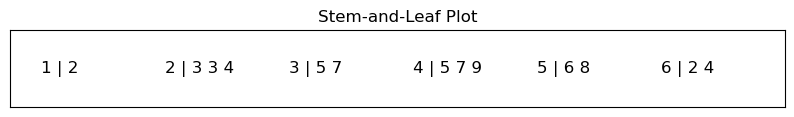

In [191]:
# We will create a new data sample:
data = [12, 23, 23, 24, 35, 37, 45, 47, 49, 56, 58, 62, 64]
leaf_units=1
# Sort the data
data = sorted(data)
    
# Find stems and leaves
stems = {}
for number in data:
    stem = number // (10**leaf_units)
    leaf = number % (10**leaf_units)
    if stem not in stems:
        stems[stem] = []
    stems[stem].append(leaf)

# Prepare for plotting
stems_list = sorted(stems.keys())
leaves_list = [stems[stem] for stem in stems_list]
    
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 1))
    
# Plot each stem and its corresponding leaves
for stem, leaves in zip(stems_list, leaves_list):
    leaves_str = ' '.join(map(str, sorted(leaves)))
    ax.text(stem, 0, f'{stem} | {leaves_str}', fontsize=12, va='center')
    
# Adjust plot limits and remove axes
ax.set_xlim(min(stems_list) - 0.25, max(stems_list) + 1)
ax.set_ylim(-1, 1)
ax.set_yticks([])
ax.set_xticks([])
    
plt.title('Stem-and-Leaf Plot')
plt.grid(True)
plt.show()

### Dot Plot
A **Dot Plot** is a simple graphical representation that displays individual data values and their frequencies. It retains the original data and is useful for visualizing the distribution of discrete data points.

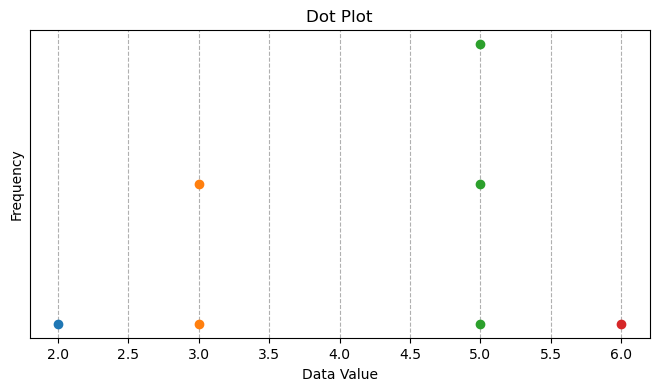

In [221]:
# We will create a new data sample:
# Sample data
data = [2, 3, 3, 5, 5, 5, 6]

# Create the dot plot
plt.figure(figsize=(8, 4))

# Scatter plot where each dot represents an occurrence of a data value
for value in set(data):
    plt.plot([value] * data.count(value), range(data.count(value)), 'o', label=f'{value}' if data.count(value) == 1 else None)
# Customize the plot

plt.title('Dot Plot')
plt.xlabel('Data Value')
plt.ylabel('Frequency')

# Remove y-axis ticks since we don't need them
plt.yticks([])  

# Display the plot
plt.grid(True, linestyle='--', alpha=1)
plt.show()

### Line Graph
A **Line Graph** is a type of chart used to display data points over time, showing how a variable changes across a continuous timeline. 
+ Horizontal Axis (X-Axis): Represents the timeline or time intervals, with equal spacing between points to indicate the passage of time.
+ Vertical Axis (Y-Axis): Represents the measurement or value of the variable being recorded, such as temperature, sales, or population.

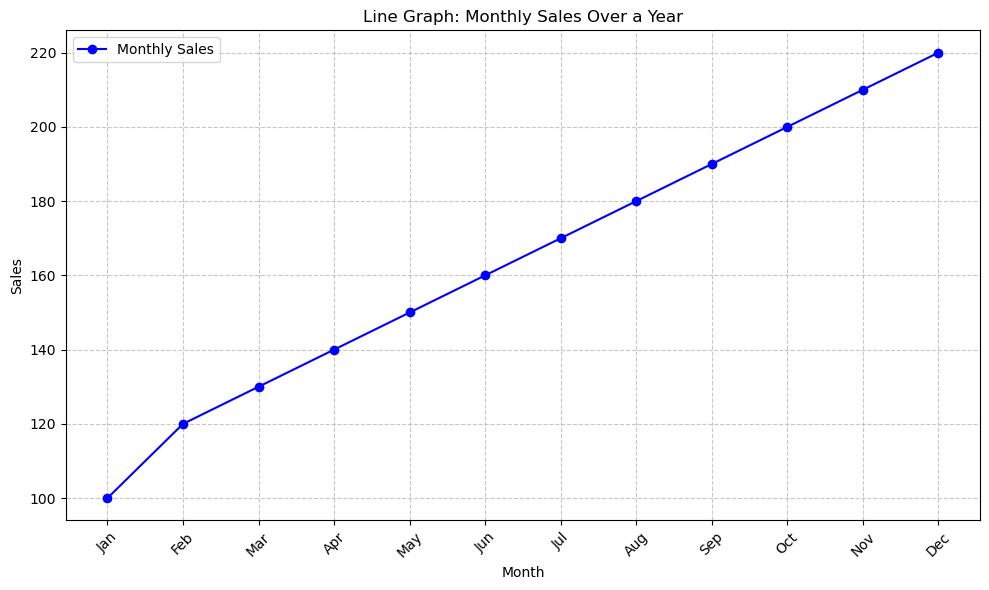

In [230]:
# We will create a new data sample:
# Sample data
time = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
values = [100, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220]

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(time, values, marker='o', linestyle='-', color='b', label='Monthly Sales')

# Customize the plot
plt.title('Line Graph: Monthly Sales Over a Year')
plt.xlabel('Month')
plt.ylabel('Sales')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Adjust layout to fit everything nicely
plt.tight_layout()
# Display the plot
plt.show()

---
## Section 2.3: Analyzing Graphs
---

### Characteristics of Graphs
Graph should have title, correctly labeled axes, and have one or more source. 

### Appropriateness of Graphs
Choosing the appropriate type of graph depends on the nature of the data and the message you want to convey. Here are some guidelines for selecting the right type of graph:

1. **Pie Charts:** Showing the proportion or percentage of categories within a whole.
2. **Bar Graphs:** Comparing quantities across different categories or groups.
3. **Pareto Chart:** Identifying the most important factors in a dataset by showing both the individual values and their cumulative total. It’s based on the Pareto Principle (80/20 rule) which suggests that a small percentage of causes often lead to a large percentage of the effects.
4. **Side-by-Side Bar Graph:** Comparing the same categories across different groups or time periods. Each group is represented by a cluster of bars, making it easy to compare values side-by-side.
5. **Stacked Bar Graph:** Showing the total value across different categories while breaking down each total into its constituent parts. It’s useful for understanding the composition and relative proportions of categories within each group.
6. **Histogram:** Displaying the distribution of a continuous variable by showing the frequency of data points within specified intervals (bins). 
7. **Frequency Polygon:** Showing the distribution of a continuous variable by connecting the midpoints of the tops of the bars in a histogram with a line.
8. **Ogive:** Displaying cumulative frequency distribution. It helps in understanding how the data accumulates over intervals.
9. **Stem Plot (Stem-and-Leaf Plot):** Displaying quantitative data while preserving the original data values. It provides a quick way to see the distribution and shape of the data.
10. **Dot Plot:** Showing the frequency of data points in a simple, easy-to-read format. Each dot represents one occurrence of a value.
11. **Line Graph:** Showing trends over time or the relationship between two continuous variables.

### Scaling of Graph
The scaling is essential for ensuring that graphs accurately and effectively convey the intended information, making the data easy to understand and interpret.

### Shape of the Graph
+ **Uniform:** The distribution is flat, with all values occurring with roughly equal frequency. There are no clear peaks or troughs.
+ **Symmetric:** The distribution is balanced and mirrors itself on both sides of a central value. The left and right sides of the graph are roughly identical.
+ **Skewed Right:** The distribution has a longer tail on the right side, with more values concentrated on the left side of the graph.
+ **Skewed Left:** The distribution has a longer tail on the left side, with more values concentrated on the right side of the graph.

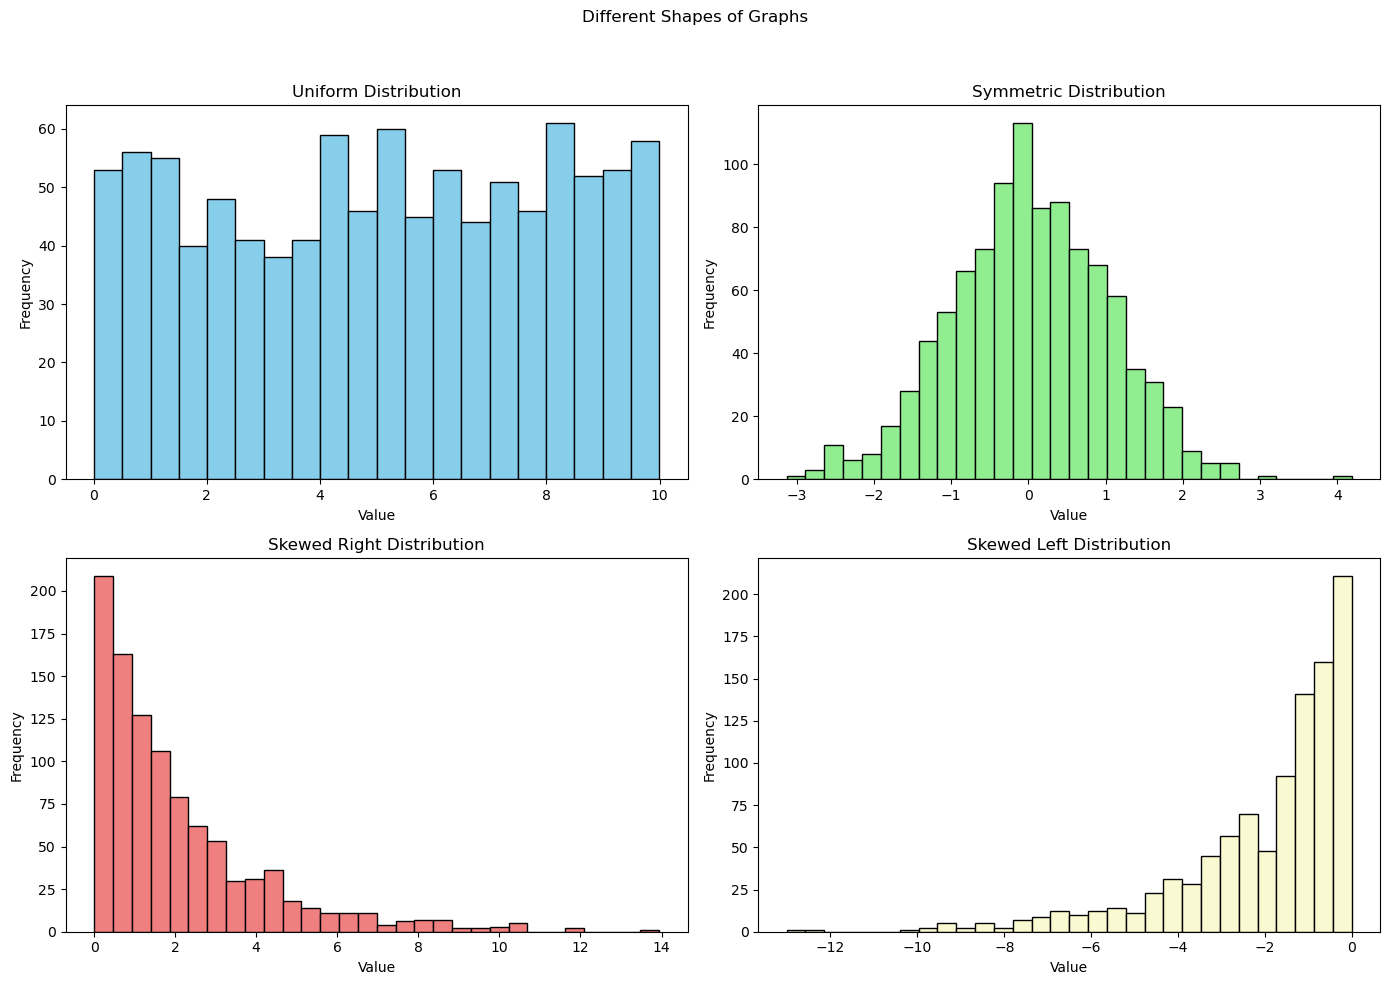

In [250]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Different Shapes of Graphs')

# 1. Uniform Distribution
uniform_data = np.random.uniform(low=0, high=10, size=1000)
axes[0, 0].hist(uniform_data, bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Uniform Distribution')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')

# 2. Symmetric Distribution (Normal Distribution)
symmetric_data = np.random.normal(loc=0, scale=1, size=1000)
axes[0, 1].hist(symmetric_data, bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Symmetric Distribution')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

# 3. Skewed Right (Positively Skewed) Distribution
skewed_right_data = np.random.exponential(scale=2, size=1000)
axes[1, 0].hist(skewed_right_data, bins=30, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Skewed Right Distribution')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

# 4. Skewed Left (Negatively Skewed) Distribution
# Use a transformation that will produce a left-skewed distribution
skewed_left_data = -np.random.exponential(scale=2, size=1000)  # Negate to create left skew
axes[1, 1].hist(skewed_left_data, bins=30, color='lightgoldenrodyellow', edgecolor='black')
axes[1, 1].set_title('Skewed Left Distribution')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

---
### Up Next Chapter 3 ...
---